In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm, colors
sns.set_theme()

import os
os.chdir("..")
import init_simple_mdp as imdp


In [3]:
df = pd.read_csv('results/player10_noturn_results.csv')
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

In [4]:
def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [5]:
epsilon_list = [1,2,4,8,16,32,64,128]
epsilon_list = [1,2,4,6,8,10,12,14,16,18,20]
epsilon_list = [1,2,3,4,5,6,7,8,9]

## Breakeven Point between Tokens and Epsilon 


In [6]:
# Get dataframe only for score values at 501 
df_501 = df.loc[df.score==501]
#df_501 = df_501.loc[df_501.epsilon <= 10]

# Create dataframes for values at 501 for each token value 
token_dfs = []

for token in range(10):
    
    temp = df_501.loc[df_501.tokens==token].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df_501.loc[df_501.epsilon==epsilon].set_index('tokens')['optimal_value'].copy()
    epsilon_dfs.append(temp)

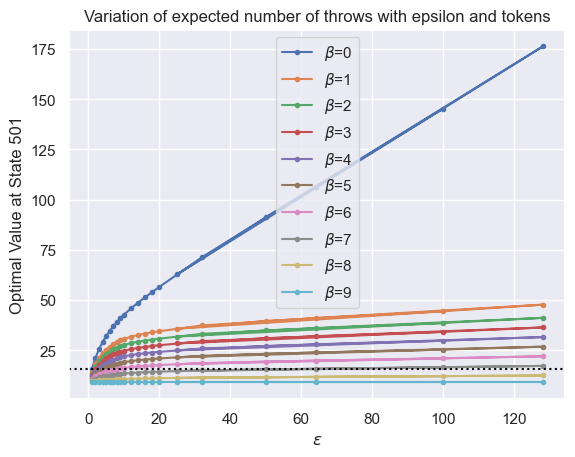

In [7]:
t_leg = []

# Plot each token line 
for token in range(10):
    t_leg.append(r'$\beta$={}'.format(token))
    fig = plt.plot(token_dfs[token],marker ='.')

fig = plt.title('Variation of expected number of throws with epsilon and tokens')
fig = plt.xlabel('$\epsilon$')
fig = plt.ylabel('Optimal Value at State 501')
fig = plt.legend(t_leg)

# Plot horizontal line for pro performance with e=1 and no tokens 
fig = plt.axhline(token_dfs[0][1],color='black',linestyle='dotted') 

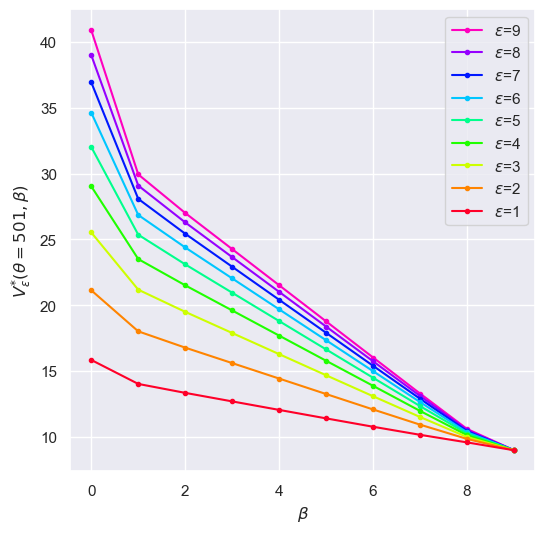

In [8]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(6,6)})

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon = epsilon_list[e]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    e_leg.append(r'$\epsilon$={}'.format(epsilon))
    fig = plt.plot(epsilon_dfs[e],marker ='.',color=color)

#fig = plt.title('Variation of expected number of throws with $\epsilon$ and credits')
fig = plt.xlabel(r'$\beta$')
fig = plt.ylabel(r'$V_{\epsilon}^{*}(\theta=501,\beta)$')
fig = plt.legend(e_leg)

# Plot horizontal line for pro performance with e=1 and no tokens 
#fig = plt.axhline(epsilon_dfs[0][0],color='black',linestyle='dotted') 

In [9]:
head_starts = [501-60*i for i in range(9)]
head_starts

[501, 441, 381, 321, 261, 201, 141, 81, 21]

In [10]:
# Get dataframe only for score values at 501 
head_start_df_list = []

for h in head_starts:
    temp  = df.loc[df.score==h].copy()
    head_start_df_list.append(temp)

epsilon = 1 
# # Create dataframes for values at 501 for each token value 
# token_dfs_441 = []

for token in range(10):
    
    temp = df_441.loc[df_441.tokens==token].set_index('epsilon')['optimal_value'].copy()
    token_dfs_441.append(temp)

# # Create dataframes for values at 501 for each token value 
# epsilon_dfs_hs = []

# for epsilon in range(1,11):
    
#     temp = df_441.loc[df_441.epsilon==epsilon].set_index('tokens')['optimal_value'].copy()
#     epsilon_dfs_441.append(temp)

NameError: name 'df_441' is not defined

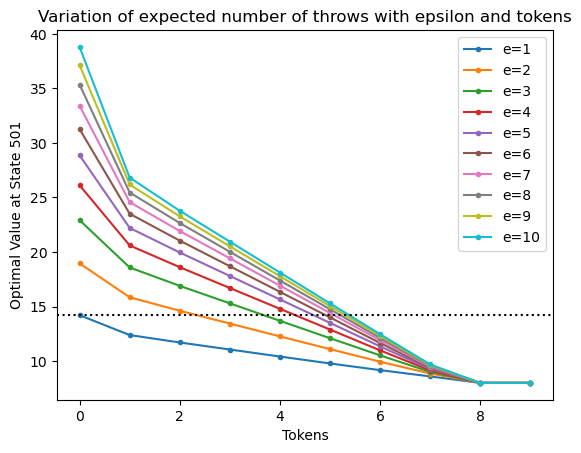

In [19]:
e_leg = []

# Plot each token line 
for epsilon in range(0,10):
    e_leg.append('e={}'.format(epsilon+1))
    fig = plt.plot(epsilon_dfs[epsilon],marker ='.')
    fig = plt.plot(epsilon_dfs[epsilon],line='..',marker ='.')

fig = plt.title('Variation of expected number of throws with epsilon and tokens')
fig = plt.xlabel('Tokens')
fig = plt.ylabel('Optimal Value at State 501')
fig = plt.legend(e_leg)

# Plot horizontal line for pro performance with e=1 and no tokens 
fig = plt.axhline(epsilon_dfs[0][0],color='black',linestyle='dotted') 

## Token Usage

In [11]:
# Add boolean column to indicate whether the policy uses tokens or not 
df['policy_is_token'] = df['optimal_policy'] >= imdp.throw_num

epsilon_dfs = []

for epsilon in range(7):
    
    temp = df.loc[df.epsilon==epsilon].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)


In [12]:
df

,epsilon,tokens,score,optimal_value,optimal_policy,optimal_policy_name,policy_is_token
0,1,0,0,0.000000,-1,NaN,False
1,1,0,1,0.000000,-1,NaN,False
2,1,0,2,2.887532,55,D1-cc-m,False
3,1,0,3,3.897533,40,SO1-c-m,False
4,1,0,4,2.329057,295,D2-c-m,False
...,...,...,...,...,...,...,...
105415,100,9,497,9.000000,750,DB,True
105416,100,9,498,9.000000,750,DB,True
105417,100,9,499,9.000000,750,DB,True
105418,100,9,500,9.000000,750,DB,True


In [13]:
epsilon_list = [1,2,4,8,16,32]

df_temp = df[df.optimal_policy != -1]

for epsilon in epsilon_list:
    temp_notokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==False][['score','tokens']]
    temp_notokens = temp_notokens.copy().reset_index()
    print(epsilon,temp_notokens.score[0])

1 2
2 2
4 2
8 2
16 2
32 2


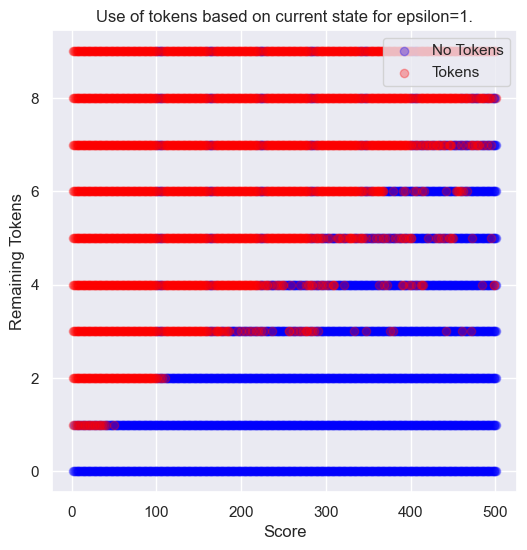

In [14]:
epsilon = 1
df_temp = df[df.optimal_policy != -1]
temp_tokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==True][['score','tokens']]
temp_notokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==False][['score','tokens']]
fig = plt.scatter(temp_notokens.score,temp_notokens.tokens,alpha=0.3,color='blue')
fig = plt.scatter(temp_tokens.score,temp_tokens.tokens,alpha=0.3,color='red')
fig = plt.legend(['No Tokens', 'Tokens'])
fig = plt.xlabel('Score')
fig = plt.ylabel('Remaining Tokens')
fig = plt.title('Use of tokens based on current state for epsilon={}.'.format(epsilon))

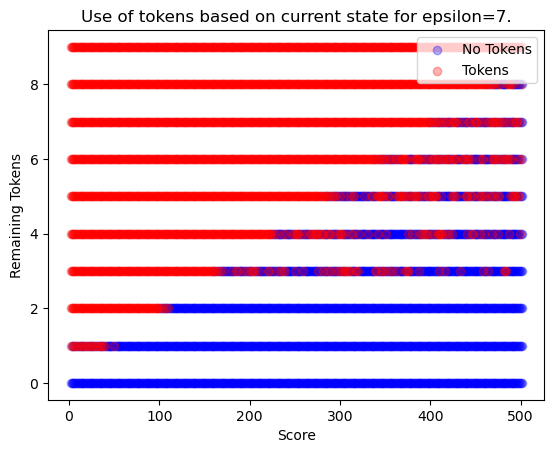

In [173]:
epsilon = 7
df_temp = df[df.optimal_policy != -1]
temp_tokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==True][['score','tokens']]
temp_notokens = df_temp.loc[df_temp.epsilon==epsilon].loc[df_temp.policy_is_token==False][['score','tokens']]
fig = plt.scatter(temp_notokens.score,temp_notokens.tokens,alpha=0.3,color='blue')
fig = plt.scatter(temp_tokens.score,temp_tokens.tokens,alpha=0.3,color='red')
fig = plt.legend(['No Tokens', 'Tokens'])
fig = plt.xlabel('Score')
fig = plt.ylabel('Remaining Tokens')
fig = plt.title('Use of tokens based on current state for epsilon={}.'.format(epsilon))

In [15]:
temp_1_notokens = df_temp.loc[df_temp.epsilon==1].loc[df_temp.policy_is_token==False]
temp_1_notokens[temp_1_notokens.tokens>2][:20]

,epsilon,tokens,score,optimal_value,optimal_policy,optimal_policy_name,policy_is_token
1605,1,3,99,3.000000,157,SI13-cc-m,False
1608,1,3,102,3.000000,132,SI4-cw-o,False
1609,1,3,103,3.000000,309,T2-cc-o,False
1611,1,3,105,3.000000,552,SI11-cc-o,False
1612,1,3,106,3.000000,669,T12-cc-o,False
1615,1,3,109,3.000000,669,T12-cc-o,False
1665,1,3,159,4.000000,10,T20-c-m,False
1668,1,3,162,4.000000,132,SI4-cw-o,False
1669,1,3,163,4.000000,240,SI10-cw-o,False
1671,1,3,165,4.000000,541,SI11-c-m,False


In [16]:
temp_1_notokens = df_temp.loc[df_temp.epsilon==7].loc[df_temp.policy_is_token==False]
temp_1_notokens[temp_1_notokens.tokens>2][0:20]

,epsilon,tokens,score,optimal_value,optimal_policy,optimal_policy_name,policy_is_token
31785,7,3,159,4.000000,728,DB-c,False
31788,7,3,162,4.000022,577,SI14-c-m,False
31791,7,3,165,4.000033,577,SI14-c-m,False
31792,7,3,166,4.000230,647,T9-cw-i,False
31794,7,3,168,4.004264,492,SI16-cw-o,False
31795,7,3,169,4.000236,647,T9-cw-i,False
31797,7,3,171,4.022104,465,T7-cw-o,False
31798,7,3,172,4.009591,515,T8-c-i,False
31799,7,3,173,4.031482,389,SO3-cw-i,False
31800,7,3,174,4.022380,465,T7-cw-o,False


In [128]:
temp_1 = df_temp.loc[df_temp.epsilon==1][['score','tokens','policy_is_token']]
temp_7 = df_temp.loc[df_temp.epsilon==7][['score','tokens','policy_is_token']]

pd.concat([temp_1,temp_7]).drop_duplicates(keep=False)

,score,tokens,policy_is_token
1605,99,3,False
1608,102,3,False
1609,103,3,False
1611,105,3,False
1612,106,3,False
...,...,...,...
35043,405,9,True
35044,406,9,True
35047,409,9,True
35097,459,9,True
